In [42]:
from itertools import chain

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import evaluation.evaluator as evaluator
from importlib import reload

reload(evaluator)

<module 'evaluation.evaluator' from '/home/alex/code/ML/ML24/exercise-1/evaluation/evaluator.py'>

In [2]:
path = "./datasets_kaggle/breast-cancer/"
train_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.lrn.csv" % path)
competition_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.tes.csv" % path)

train_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)
competition_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)

train_data.drop(columns=['ID'], inplace=True)
competition_data.drop(columns=['ID'], inplace=True)

In [3]:
train_data

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [4]:
competition_data

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [5]:
y = train_data[('class')]
X = train_data.drop('class', axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# y_comp = competition_data['grade']  # Target variable does not exist for competition data
X_comp = competition_data
print(X_train.dtypes)

radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst            float64
 concavePointsWorst        float64
 symmetryWorst      

In [6]:
print("null values in train data: " + str(X_train.isnull().sum().sum()))
print("null values in test data: " + str(X_test.isnull().sum().sum()))
print("null values in competition data: " + str(X_comp.isnull().sum().sum()))

null values in train data: 0
null values in test data: 0
null values in competition data: 0


In [7]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    #('scaler', StandardScaler())
])

# Preprocess training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_comp = pipeline.transform(X_comp)

In [8]:
# Encode target variable
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [30]:
np.logspace(-7, -2, num=50)

array([1.00000000e-07, 1.26485522e-07, 1.59985872e-07, 2.02358965e-07,
       2.55954792e-07, 3.23745754e-07, 4.09491506e-07, 5.17947468e-07,
       6.55128557e-07, 8.28642773e-07, 1.04811313e-06, 1.32571137e-06,
       1.67683294e-06, 2.12095089e-06, 2.68269580e-06, 3.39322177e-06,
       4.29193426e-06, 5.42867544e-06, 6.86648845e-06, 8.68511374e-06,
       1.09854114e-05, 1.38949549e-05, 1.75751062e-05, 2.22299648e-05,
       2.81176870e-05, 3.55648031e-05, 4.49843267e-05, 5.68986603e-05,
       7.19685673e-05, 9.10298178e-05, 1.15139540e-04, 1.45634848e-04,
       1.84206997e-04, 2.32995181e-04, 2.94705170e-04, 3.72759372e-04,
       4.71486636e-04, 5.96362332e-04, 7.54312006e-04, 9.54095476e-04,
       1.20679264e-03, 1.52641797e-03, 1.93069773e-03, 2.44205309e-03,
       3.08884360e-03, 3.90693994e-03, 4.94171336e-03, 6.25055193e-03,
       7.90604321e-03, 1.00000000e-02])

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'hidden_layer_sizes': (15, 15, 15), 'max_iter': 800, 'verbose': False}
Hyperparameter  learning_rate_init  value:  1e-06
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 3.596783ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  1.4030037231905748e-06
Accuracy:  0.3706293706293706
Recall:  0.3706293706293706
Precision:  0.13736613037312337
F1:  0.20044241472812901
Time: 3.307819ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |   0 |  90 |
|  1 |   0 |  53 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  1.9684194472866114e-06
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215

/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  4.146169559796814e-05
Accuracy:  0.7552447552447552
Recall:  0.7552447552447552
Precision:  0.8237762237762237
F1:  0.7148396968246297
Time: 195.307970ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  35 |  18 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  5.817091329374358e-05
Accuracy:  0.916083916083916
Recall:  0.916083916083916
Precision:  0.9259563965446318
F1:  0.913349947924416
Time: 192.138672ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  12 |  41 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  8.161400793251835e-05
Accuracy:  0.8321678321678322
Recall:  0.8321678321678322
Precision:  0.8675009201324991
F1:  0.8174795075799379
Time: 185.855865ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  24 |  29 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.00011450475699382824
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9525288308183044
F1:  0.9504987920829505
Time: 184.651136ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   6 |  47 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  0.00016065060038537288
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9525288308183044
F1:  0.9504987920829505
Time: 187.367916ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   6 |  47 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.00022539339047347913
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9796977216332055
F1:  0.9788874184863361
Time: 185.087204ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   3 |  50 |
+----+-----+-----+


/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  learning_rate_init  value:  0.00031622776601683794
Accuracy:  0.993006993006993
Recall:  0.993006993006993
Precision:  0.9930838392376855
F1:  0.9929930106725687
Time: 187.438011ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.0004436687330978611
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9655177080983532
F1:  0.9648123641438936
Time: 156.534195ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   4 |  49 |
+----+-----+-----+
Hyperparameter  learning_rate_init  value:  0.0006224688843995446
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9652663191989034
F1:  0.9651006853533873
Time: 138.847589ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparamet

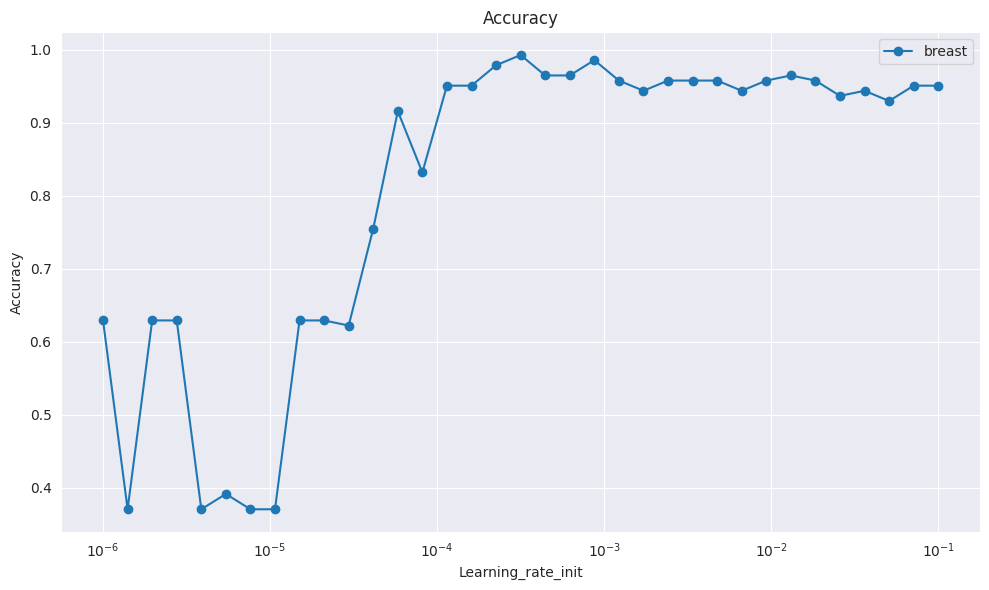

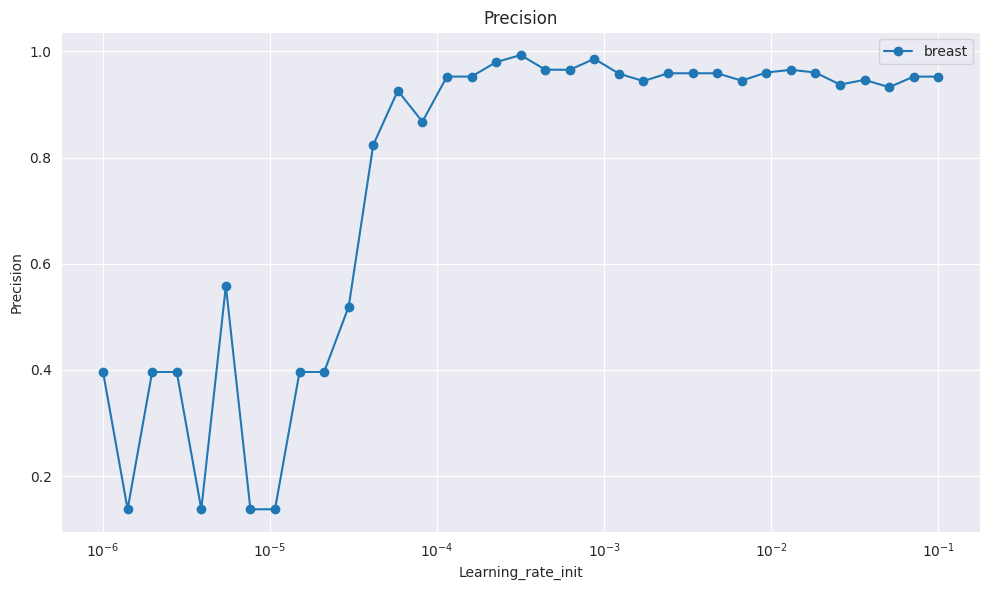

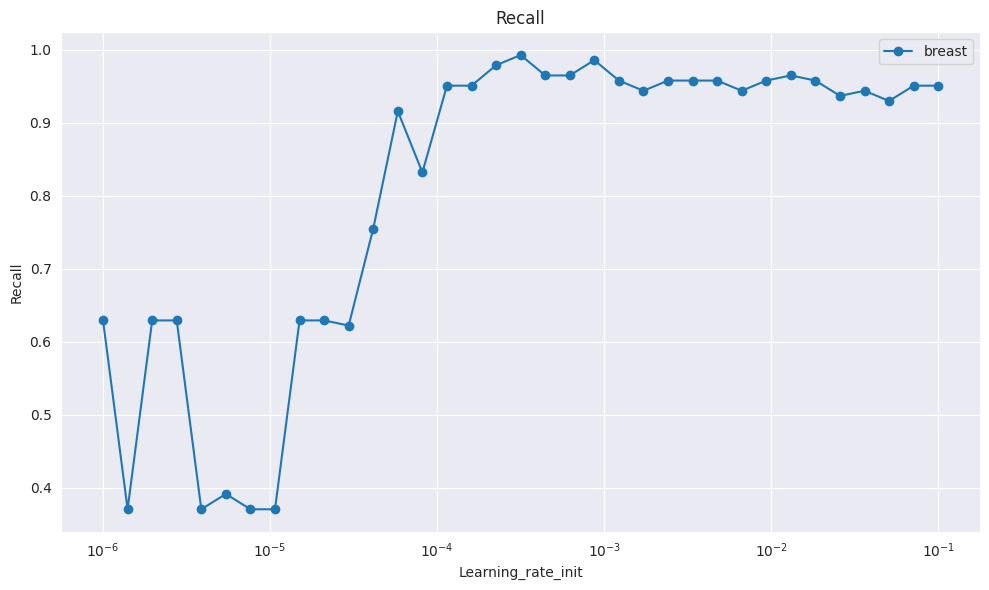

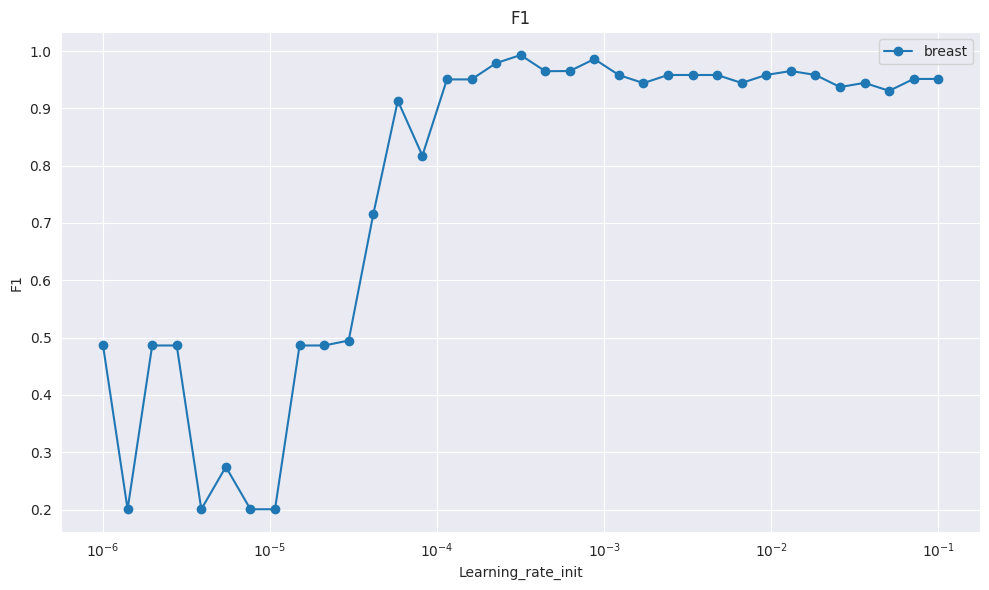

In [27]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'learning_rate_init': np.logspace(-6, -1, num=35)}
test = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": test}, x_axis='learning_rate_init', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=True)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (15, 15, 15), 'verbose': False}
Hyperparameter  max_iter  value:  50
Accuracy:  0.3706293706293706
Recall:  0.3706293706293706
Precision:  0.13736613037312337
F1:  0.20044241472812901
Time: 11.683226ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |   0 |  90 |
|  1 |   0 |  53 |
+----+-----+-----+
Hyperparameter  max_iter  value:  100
Accuracy:  0.8041958041958042
Recall:  0.8041958041958042
Precision:  0.8506578167595117
F1:  0.7822305899228976
Time: 22.565603ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  28 |  25 |
+----+-----+-----+
Hyperparameter  max_iter  value:  150
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9796977216332055
F1:  0.9788874184863361
Time: 35.163164ms
Confusion Matrix:

/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

Hyperparameter  max_iter  value:  300
Accuracy:  0.986013986013986
Recall:  0.986013986013986
Precision:  0.9863180297962907
F1:  0.9859563513409668
Time: 70.347071ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  max_iter  value:  350
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.979040190578652
F1:  0.9789790320177061
Time: 79.056978ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  max_iter  value:  400
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 93.911409ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  max_iter  value:  450
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precisi

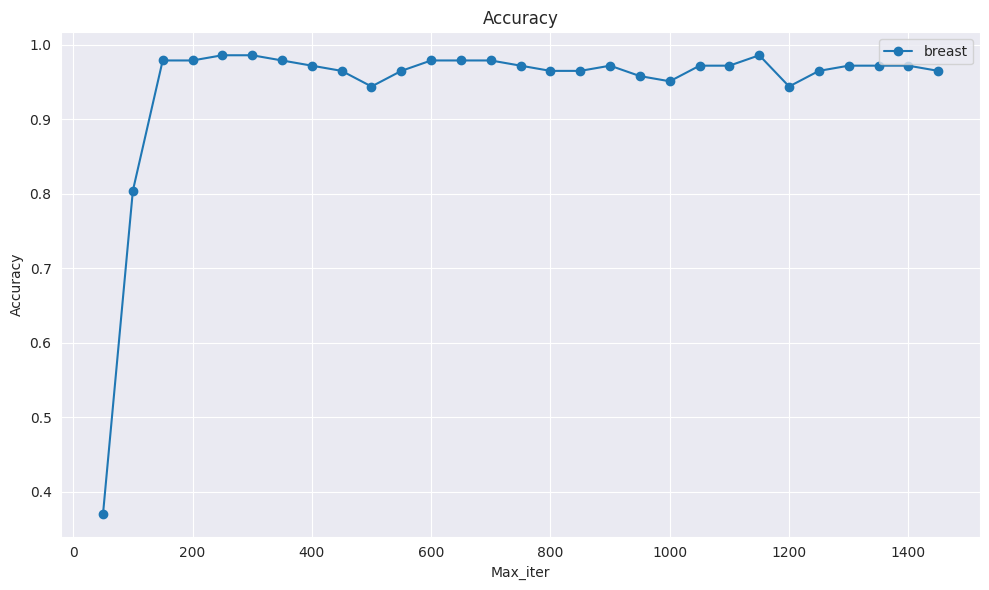

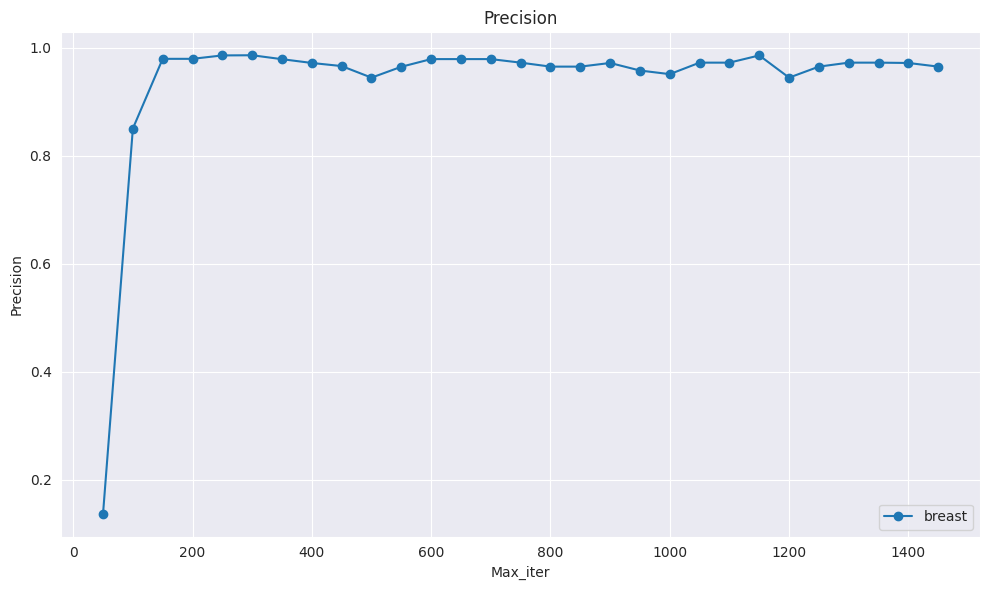

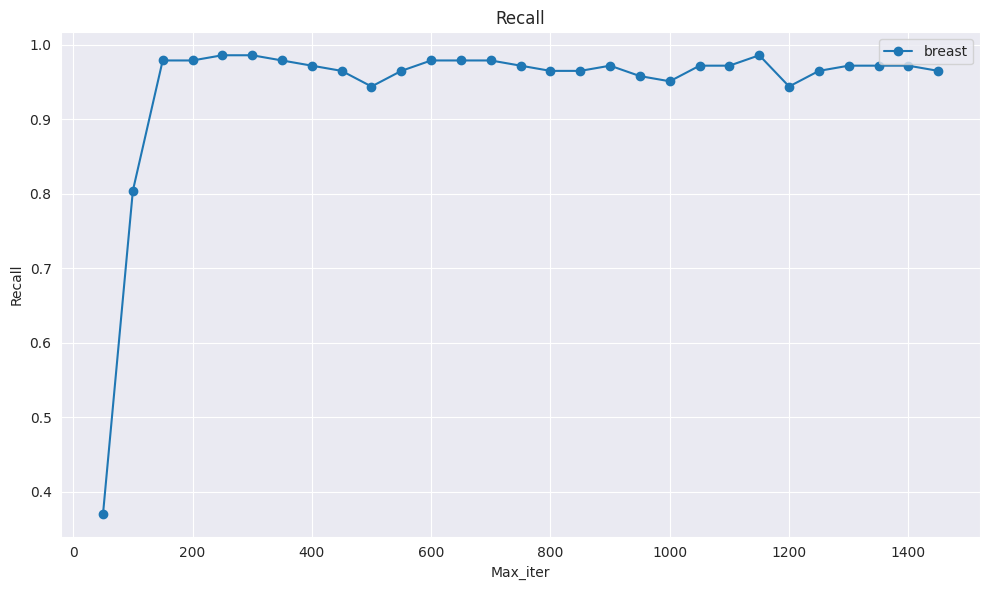

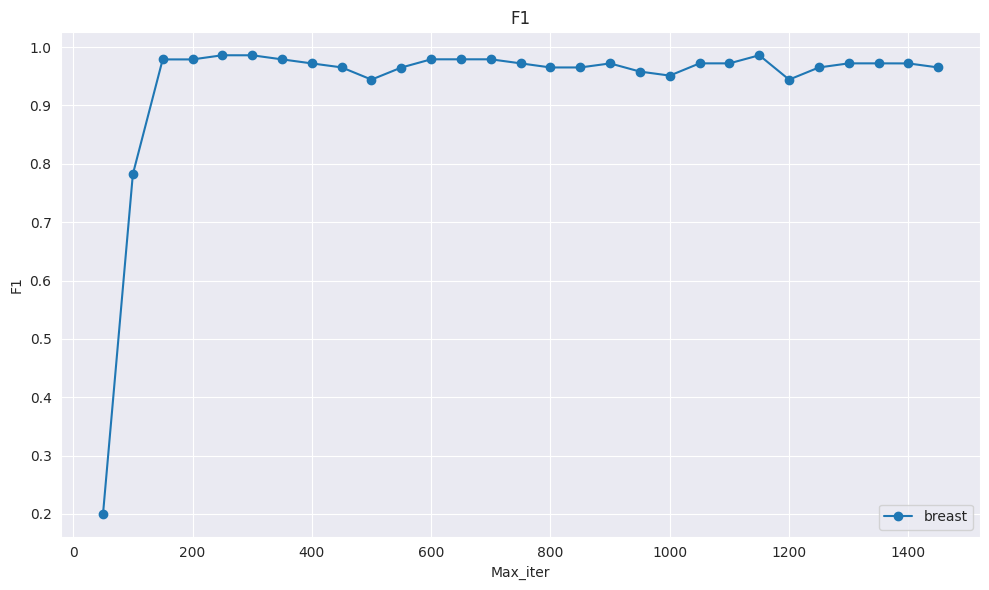

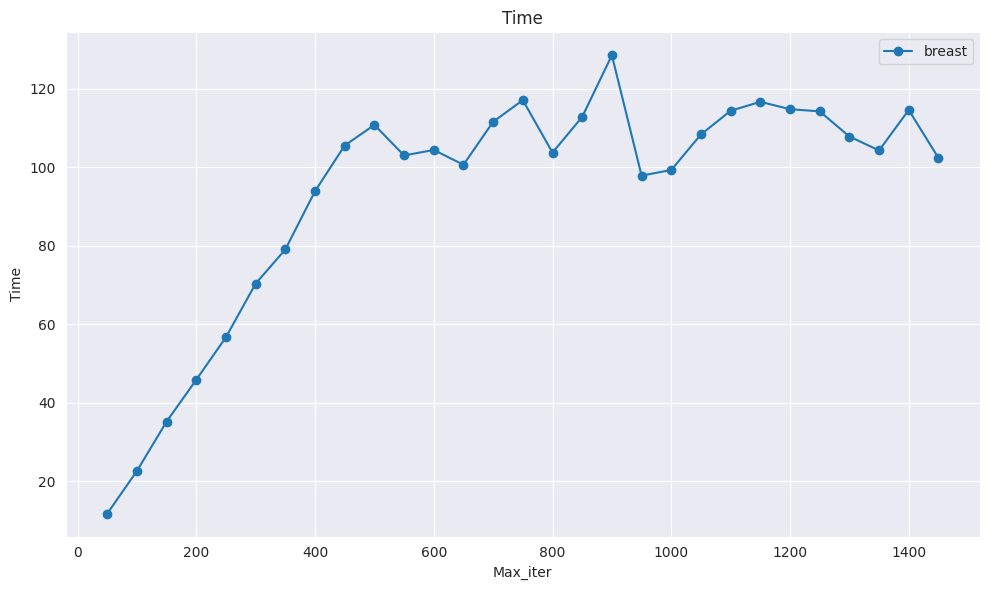

In [33]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    #'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'max_iter': range(50, 1500, 50)}
test = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": test}, x_axis='max_iter', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (15, 15, 15), 'max_iter': 1000, 'verbose': False}
Hyperparameter  activation  value:  identity
Accuracy:  0.958041958041958
Recall:  0.958041958041958
Precision:  0.958041958041958
F1:  0.958041958041958
Time: 92.286825ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  activation  value:  logistic
Accuracy:  0.6293706293706294
Recall:  0.6293706293706294
Precision:  0.39610738911438215
F1:  0.48620906990005697
Time: 17.928123ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  53 |   0 |
+----+-----+-----+
Hyperparameter  activation  value:  tanh
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9652663191989034
F1:  0.9651006853533873
Time: 109.472275ms
Confusio

/home/alex/.cache/pypoetry/virtualenvs/ml24-cRmhZNh3-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperparameter  activation  value:  logistic
Accuracy:  0.9790209790209791
Recall:  0.9790209790209791
Precision:  0.9792014061676984
F1:  0.9790604112120322
Time: 252.371073ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  activation  value:  tanh
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9726319135410045
F1:  0.9721298260624104
Time: 98.429203ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  87 |   3 |
|  1 |   1 |  52 |
+----+-----+-----+
Hyperparameter  activation  value:  relu
Accuracy:  0.951048951048951
Recall:  0.951048951048951
Precision:  0.9513312322301086
F1:  0.9511409594947421
Time: 130.968332ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  86 |   4 |
|  1 |   3 |  50 |
+----+-----+-----+


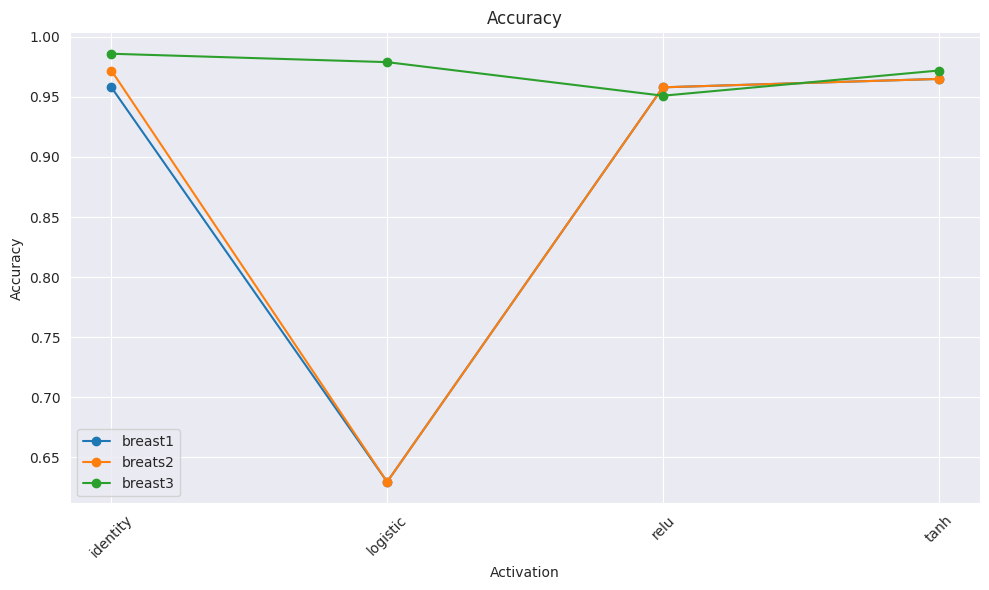

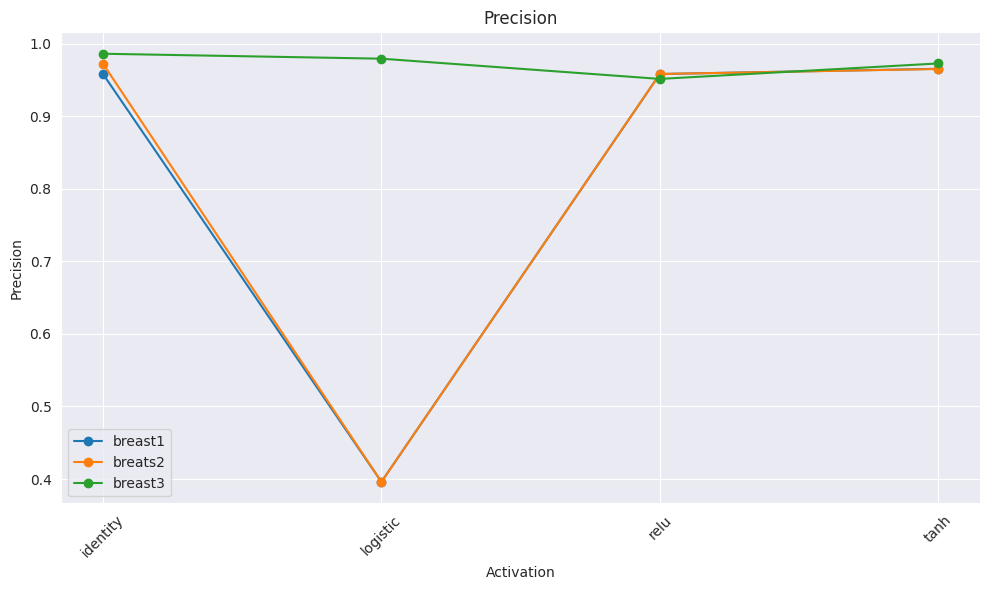

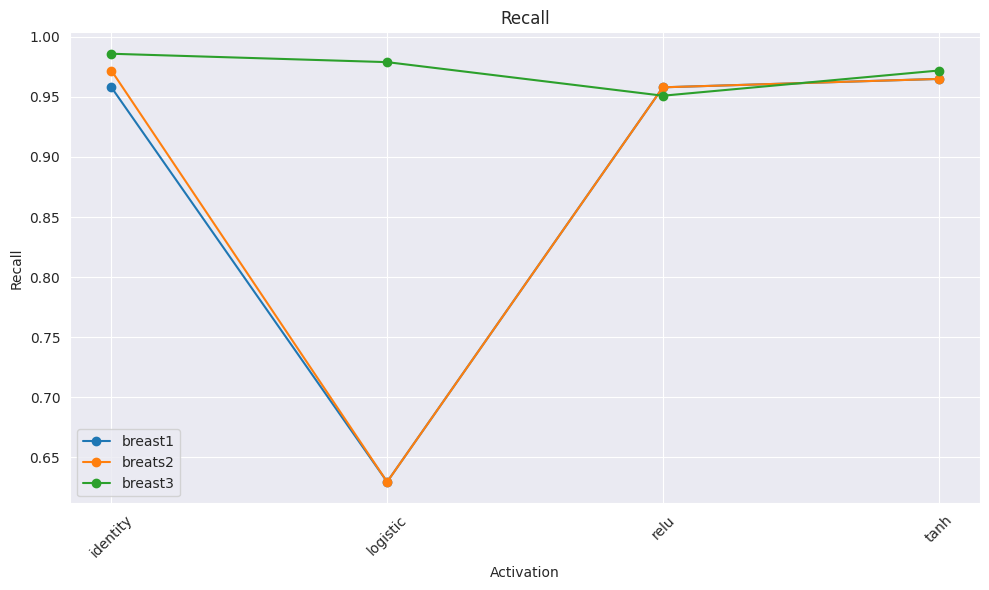

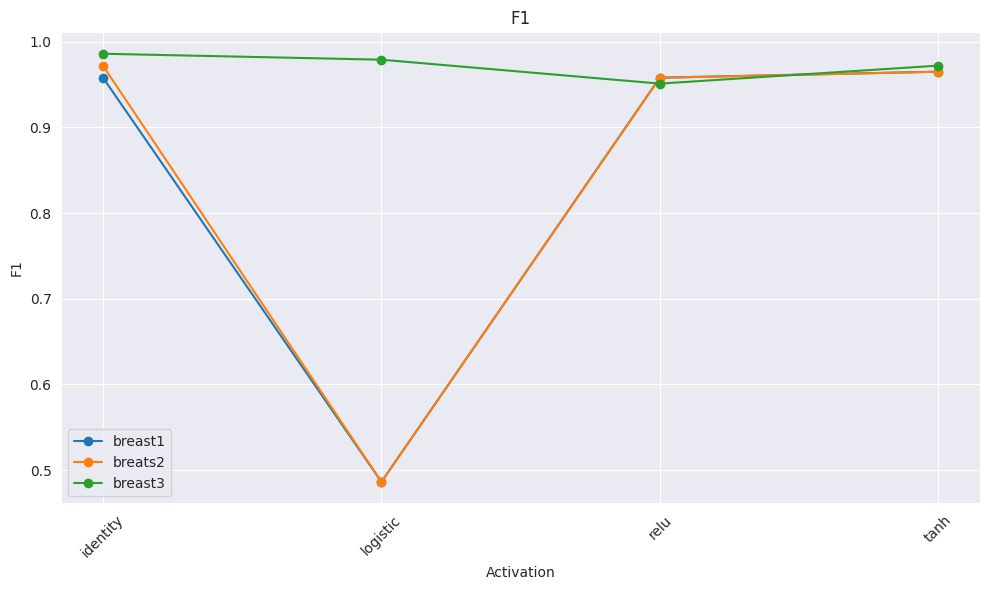

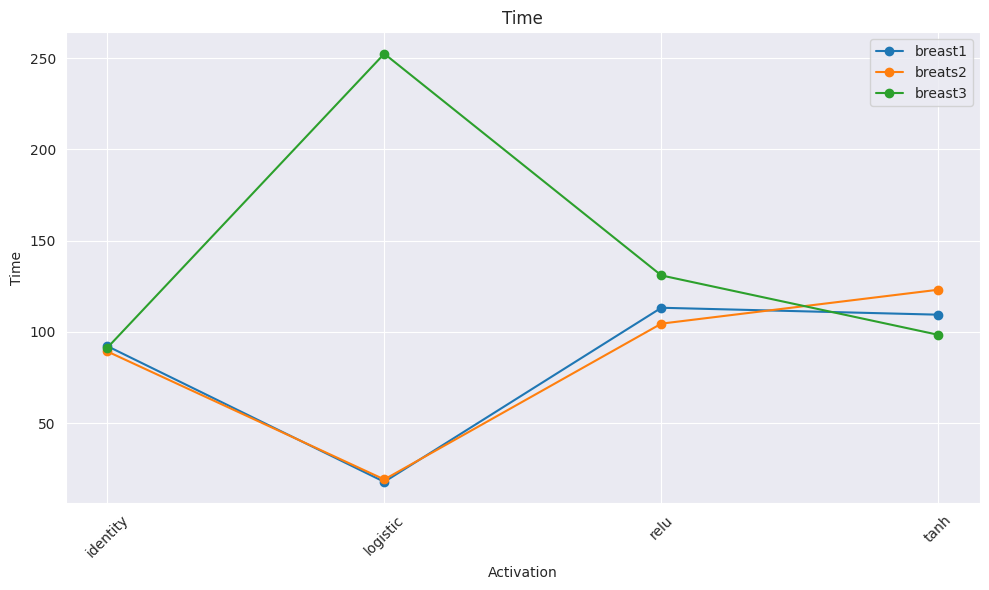

In [40]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    #'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 1000,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'activation': ['identity', 'logistic', 'tanh', 'relu']}
test = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
test2 = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
test3 = evaluator.evaluate2(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast1": test, "breats2": test2, "breast3": test3}, x_axis='activation', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

# Random forrest

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'criterion': 'gini', 'verbose': False}
Hyperparameter  n_estimators  value:  1
Accuracy:  0.9370629370629371
Recall:  0.9370629370629371
Precision:  0.9381824316034842
F1:  0.9363555898209365
Time: 3.175259ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   7 |  46 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  2
Accuracy:  0.9300699300699301
Recall:  0.9300699300699301
Precision:  0.9370629370629371
F1:  0.9282680039258987
Time: 4.140377ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  90 |   0 |
|  1 |  10 |  43 |
+----+-----+-----+
Hyperparameter  n_estimators  value:  3
Accuracy:  0.9090909090909091
Recall:  0.9090909090909091
Precision:  0.9088219472834856
F1:  0.9089091387433929
Time: 4.987955ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  84 |   6 |
|  1 |   7 |  46 |
+----

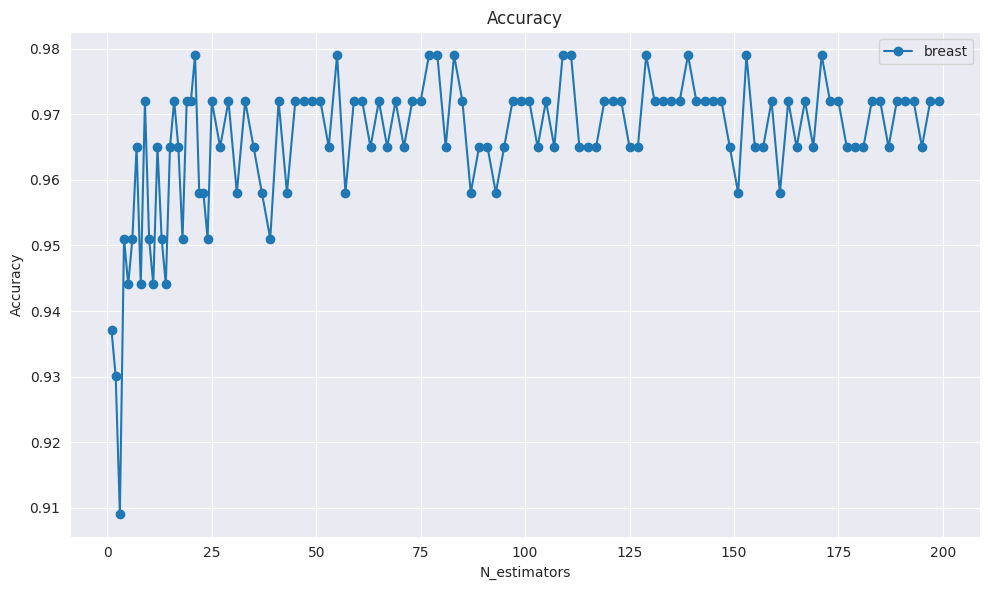

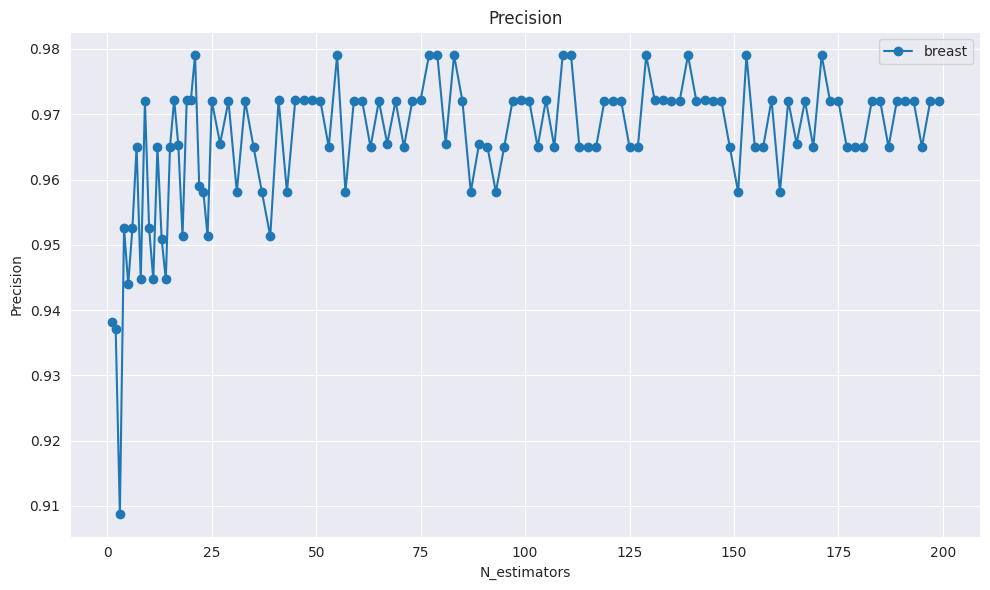

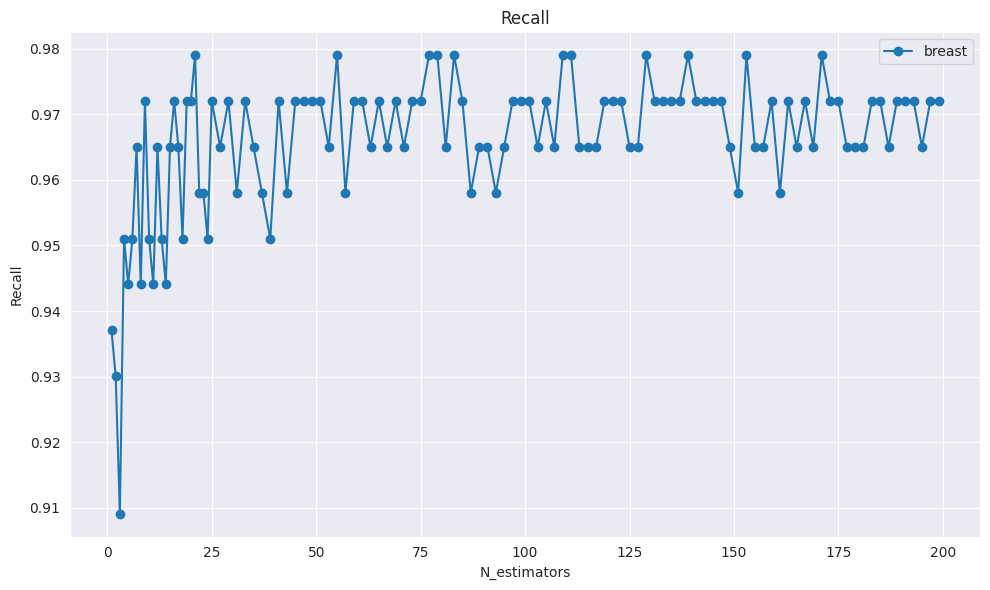

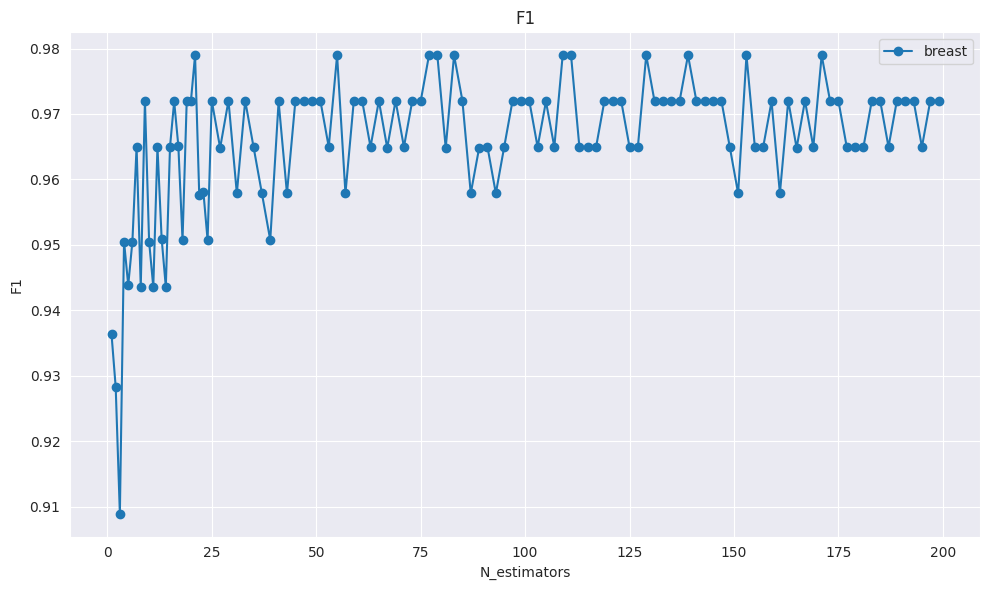

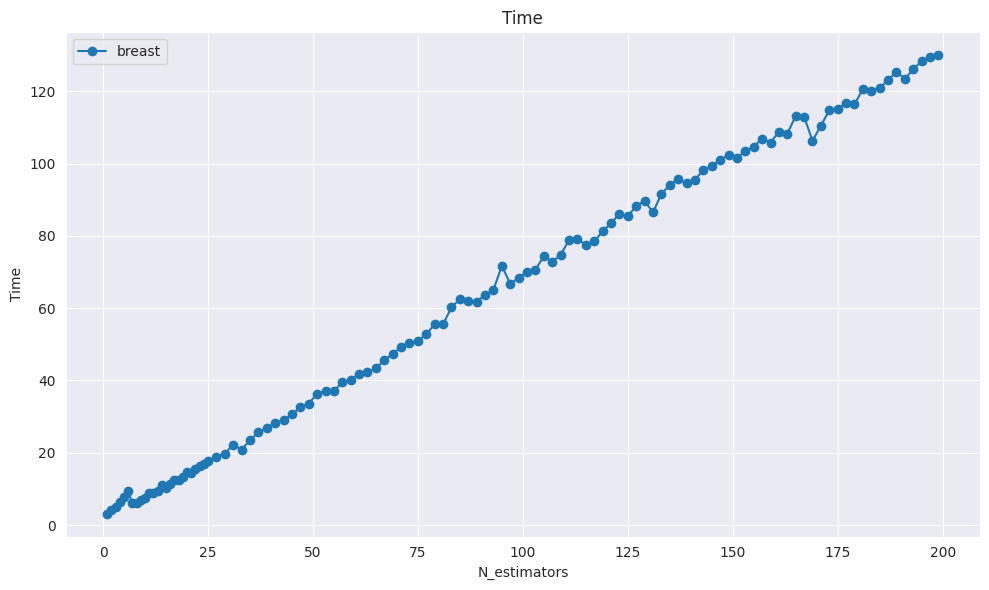

In [45]:
hyperparameters = {
    #'n_estimators': 100,
    'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'n_estimators': chain(range(1, 25, 1), range(25, 200, 2))}
test = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast": test}, x_axis='n_estimators', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'n_estimators': 5, 'verbose': False}
Hyperparameter  criterion  value:  gini
Accuracy:  0.965034965034965
Recall:  0.965034965034965
Precision:  0.9649965419196188
F1:  0.9649650533628434
Time: 4.208326ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   3 |  50 |
+----+-----+-----+
Hyperparameter  criterion  value:  entropy
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.972027972027972
F1:  0.972027972027972
Time: 4.662275ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  88 |   2 |
|  1 |   2 |  51 |
+----+-----+-----+
Hyperparameter  criterion  value:  log_loss
Accuracy:  0.972027972027972
Recall:  0.972027972027972
Precision:  0.9722098021330758
F1:  0.9719127026819333
Time: 4.227400ms
Confusion Matrix: 
+----+-----+-----+
|    |   0 |   1 |
|----+-----+-----|
|  0 |  89 |   1 |
|  1 |   3 |  50 |
+----+--

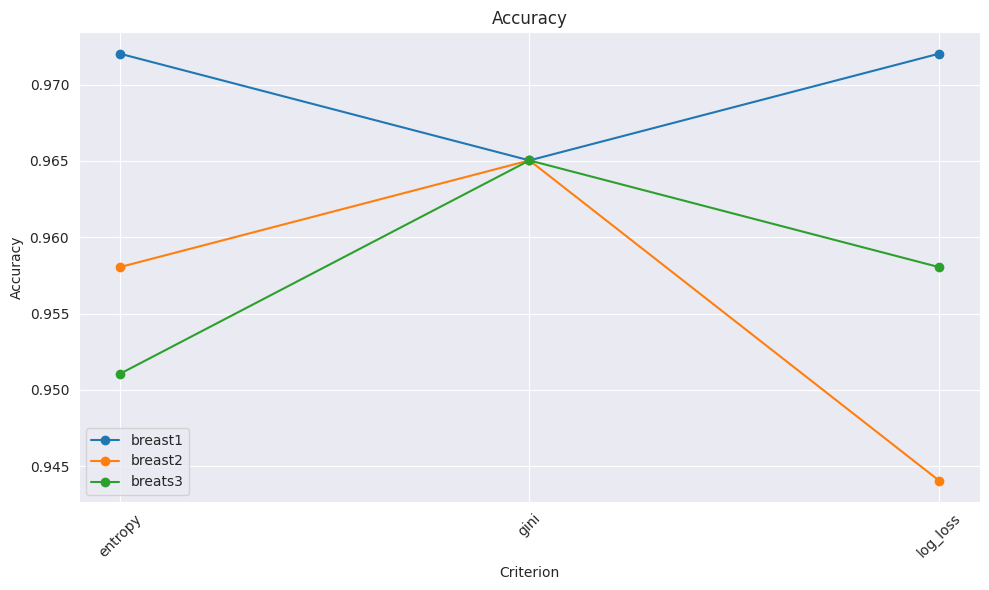

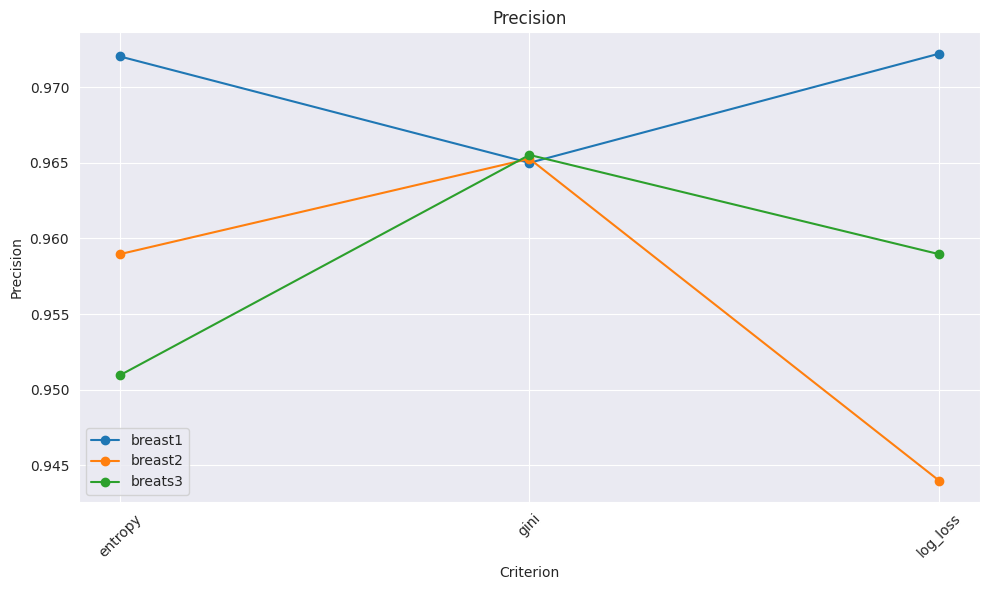

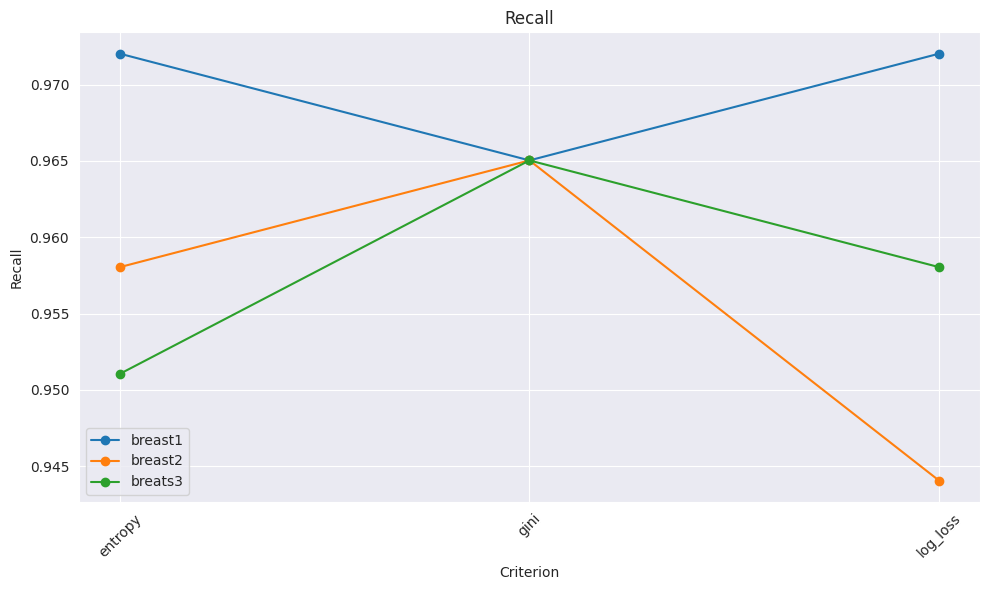

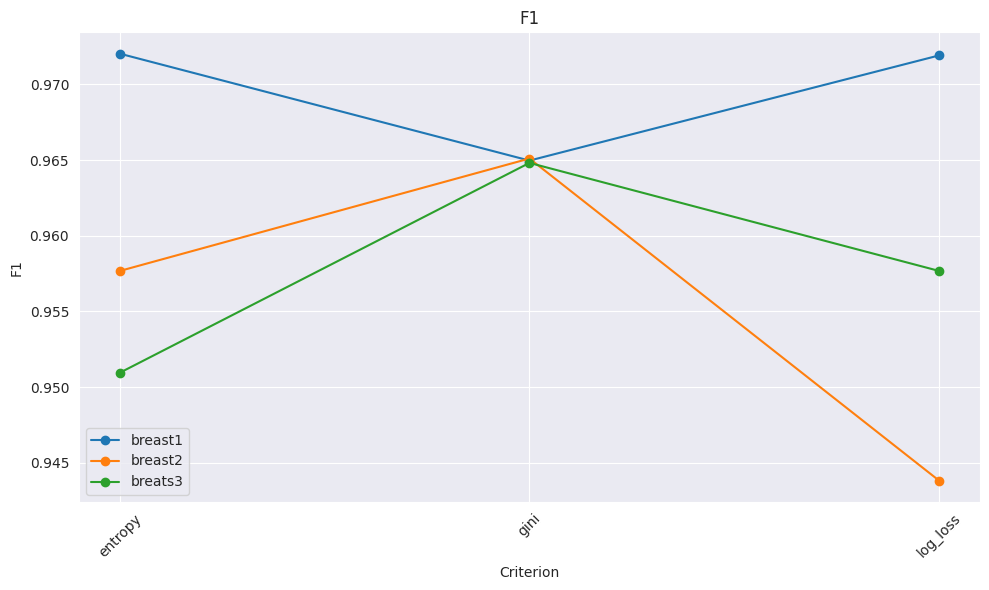

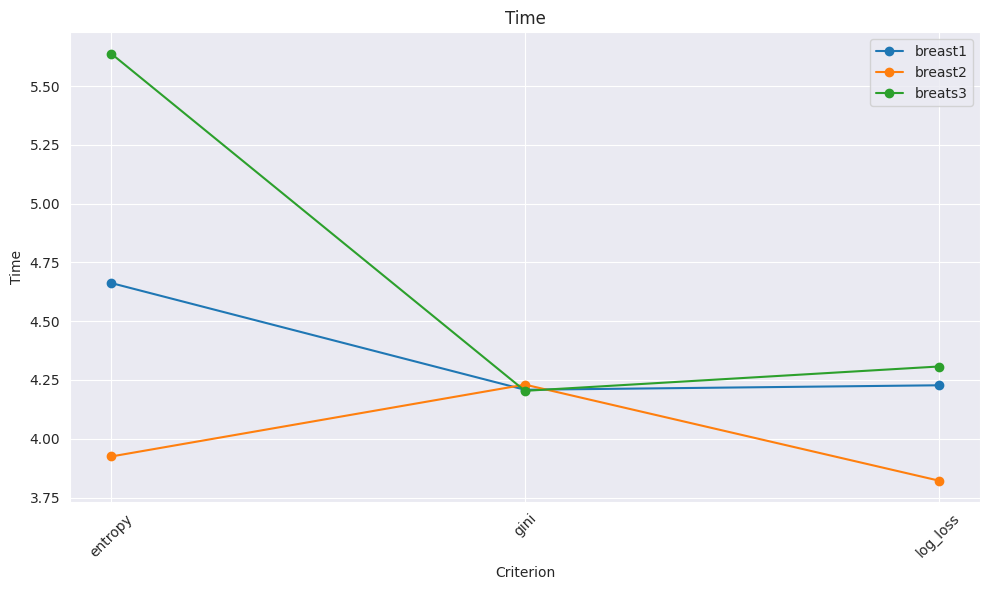

In [52]:
reload(evaluator)
hyperparameters = {
    'n_estimators': 5,
    #'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'criterion': ['gini', 'entropy', 'log_loss']}
test = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
test2 = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
test3 = evaluator.evaluate2(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator)
evaluator.draw_diagram2_list({"breast1": test, "breast2": test2, "breats3": test3}, x_axis='criterion', y_axis=['accuracy', 'precision', 'recall', 'f1', 'time'], logaritmic=False)

In [53]:
# Bayesian